In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
%matplotlib inline

2 задание

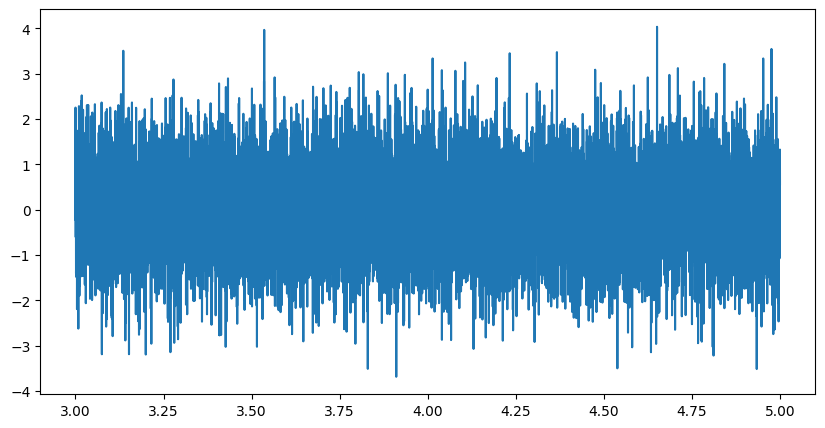

In [3]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

3 задание

In [15]:
import statsmodels.api as sm

def kpss(x, nlags = 'auto'):
    return sm.tsa.stattools.kpss(x, nlags = 'auto')

kpss(x)

<ipython-input-15-8218d9cd4279>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(0.07723430967786732,
 0.1,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

7-8 задание

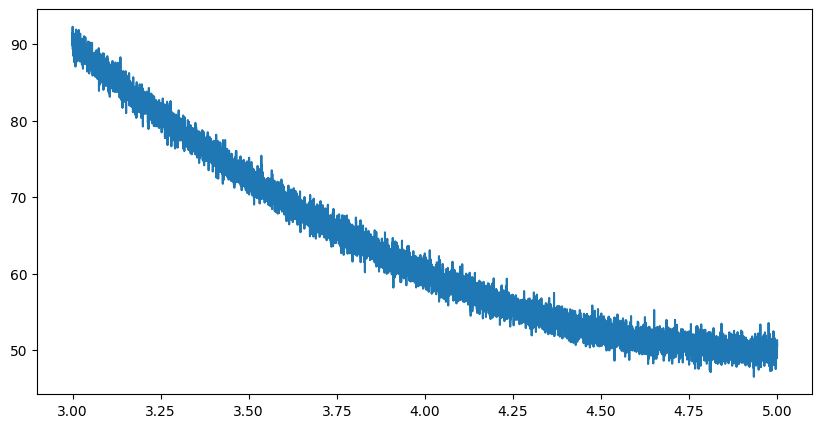

In [16]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [17]:
kpss(xv)

<ipython-input-15-8218d9cd4279>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(15.970244891493618,
 0.01,
 59,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Тут текст

9 задание

In [26]:
x1, x2 = x[:len(x)//2], x[len(x)//2:]
xv1, xv2 = xv[:len(xv)//2], xv[len(xv)//2:]

for i in [stats.f_oneway(x1, x2), stats.f_oneway(xv1, xv2)]:
    print(i)

F_onewayResult(statistic=0.13098985540176641, pvalue=0.7174155715030242)
F_onewayResult(statistic=23109.60433730041, pvalue=0.0)



тут текст

11 задание

In [28]:
for i in [stats.ttest_ind(x1, x2), stats.ttest_ind(xv1, xv2)]:
    print(i)

TtestResult(statistic=0.3619252069167977, pvalue=0.7174155715021621, df=9998.0)
TtestResult(statistic=152.01843420223875, pvalue=0.0, df=9998.0)


тут текст

13 задание

In [30]:
for i in [stats.skewtest(x), stats.skewtest(xv), stats.ks_2samp(x1, x2), stats.ks_2samp(xv1, xv2)]:
    print(i)

SkewtestResult(statistic=-0.8087258718513777, pvalue=0.41867284315381414)
SkewtestResult(statistic=23.785468713464848, pvalue=4.722081271444238e-125)
KstestResult(statistic=0.0088, pvalue=0.9902825317566453, statistic_location=-0.42547993853674343, statistic_sign=-1)
KstestResult(statistic=0.958, pvalue=0.0, statistic_location=60.25599016829228, statistic_sign=-1)


тут текст

14 задание

In [32]:
x = rand.randn(10000)
y = rand.rand(10000)

stats.ttest_ind(x, y)

print(f'Мат. ожидание x: {np.mean(x)}, Мат. ожидание y: {np.mean(y)}')

Мат. ожидание x: -0.010760196812809908, Мат. ожидание y: 0.49181072663377357


16 задание

In [33]:
xm = rand.randn(10000)
ym = rand.rand(10000)-0.5
stats.ttest_ind(xm, ym)

TtestResult(statistic=-0.132793832659309, pvalue=0.8943577680629169, df=19998.0)